In [15]:
import pandas as pd

In [16]:
# Import raw data
data = pd.read_csv("../de_id_data_v2_6.6.2024.csv")
data

/var/folders/0t/dc47jt692_qc1qb7bqkgylhw0000gn/T/ipykernel_70076/3435602546.py:2: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../de_id_data_v2_6.6.2024.csv")


,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
0,10037229,12,27.45,NaN,0,0,1,4,0,1,...,0,0,NaN,1.0,0.172123,Moderate Risk,NaN,0.0,3,2023-02-09
1,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
2,10079786,52,39.45,NaN,1,0,0,2,0,0,...,0,0,NaN,0.0,0.197289,High Risk,Last prediction,1.0,3,2024-03-20
3,10098651,7,27.45,NaN,1,0,0,2,0,0,...,0,0,NaN,0.0,0.298824,High Risk,NaN,0.0,3,2023-03-16
4,10112206,22,18.00,NaN,0,0,0,2,1,1,...,0,0,NaN,0.0,0.244291,High Risk,NaN,0.0,3,2023-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473151,13516860,57,39.45,NaN,0,0,0,3,0,0,...,0,0,NaN,0.0,0.252709,High Risk,NaN,0.0,3,2022-12-19
473152,13525823,62,39.45,NaN,0,0,0,2,0,0,...,0,0,NaN,0.0,0.132705,Moderate Risk,NaN,0.0,3,2023-04-17
473153,13526514,47,39.45,NaN,1,0,0,1,0,1,...,0,1,NaN,0.0,0.196135,High Risk,NaN,0.0,3,2023-02-14
473154,13530398,52,39.45,NaN,0,0,1,2,0,0,...,0,1,NaN,0.0,0.249059,High Risk,NaN,0.0,3,2023-01-17


In [17]:
# Check for missing values
data.isnull().sum()

appointment_id                               0
age_deid                                     0
bmi_deid                                     0
ethnicity                               457315
ethnic_category_black                        0
ethnic_category_unknown                      0
gender_male                                  0
imd19_quintile                               0
main_spoken_language_other                   0
current_smoker                               0
substance_misuse                             0
smoking_unknown                              0
referral_to_treatment_period_status     473156
tfc_name                                457311
patient_on_multiple_pathways            457315
appt_month                                 351
appt_hour                                  351
appt_duration                              351
hospital_service_display                  1844
service_mapping                              0
reason_display                             351
appointment_t

In [24]:
# Remove column "referral_to_treatment_period_status" as it's empty
data = data.drop(columns=["referral_to_treatment_period_status"])

### Split out historic data

In [18]:
# Split out data: use case 3 & case control 1 (case since model went live)
historic = data.loc[(data["use_case"]  == 3) & (data["case_control"] == 1)]
historic

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
1,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
2,10079786,52,39.45,NaN,1,0,0,2,0,0,...,0,0,NaN,0.0,0.197289,High Risk,Last prediction,1.0,3,2024-03-20
5,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.141745,Moderate Risk,Last prediction,1.0,3,2023-11-24
6,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.266140,High Risk,First prediction,1.0,3,2023-11-24
9,10211058,32,39.45,NaN,0,1,0,2,0,0,...,0,0,NaN,1.0,0.062844,Low Risk,First prediction,1.0,3,2024-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473124,13390142,17,27.45,NaN,1,0,1,3,0,0,...,0,0,NaN,1.0,0.223362,High Risk,Last prediction,1.0,3,2024-03-11
473134,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.163437,Moderate Risk,First prediction,1.0,3,2024-03-20
473135,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.080699,Low Risk,Last prediction,1.0,3,2024-03-20
473142,13463451,52,27.45,NaN,1,0,1,2,0,0,...,0,1,NaN,0.0,0.292078,High Risk,First prediction,1.0,3,2024-01-30


In [19]:
# Check for missing values
historic.isnull().sum()

appointment_id                               0
age_deid                                     0
bmi_deid                                     0
ethnicity                               278799
ethnic_category_black                        0
ethnic_category_unknown                      0
gender_male                                  0
imd19_quintile                               0
main_spoken_language_other                   0
current_smoker                               0
substance_misuse                             0
smoking_unknown                              0
referral_to_treatment_period_status     278799
tfc_name                                278795
patient_on_multiple_pathways            278799
appt_month                                 208
appt_hour                                  208
appt_duration                              208
hospital_service_display                  1002
service_mapping                              0
reason_display                             208
appointment_t

In [20]:
# Remove records with missing appt_date and those with appt_date > 24/4/2024
historic = historic.dropna(subset=['appt_date'])
historic = historic[historic['appt_date'] <= '2024-04-24']
historic["appt_date"].sort_values()

255077    2023-11-24
250762    2023-11-24
219029    2023-11-24
219028    2023-11-24
250786    2023-11-24
             ...    
470353    2024-04-24
470354    2024-04-24
470355    2024-04-24
470337    2024-04-24
288162    2024-04-24
Name: appt_date, Length: 278483, dtype: object

In [21]:
# Filter for First Prediction only
historic = historic[historic['prediction_type'] == "First prediction"]
historic

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
1,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
6,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.266140,High Risk,First prediction,1.0,3,2023-11-24
9,10211058,32,39.45,NaN,0,1,0,2,0,0,...,0,0,NaN,1.0,0.062844,Low Risk,First prediction,1.0,3,2024-01-19
21,10550310,72,39.45,NaN,1,0,1,4,0,0,...,0,0,NaN,0.0,0.040898,Low Risk,First prediction,1.0,3,2024-01-19
30,10670198,32,39.45,NaN,1,0,0,2,0,1,...,0,0,NaN,1.0,0.389798,High Risk,First prediction,1.0,3,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473088,13147714,2,27.45,NaN,0,0,0,1,0,0,...,0,0,NaN,1.0,0.160467,Moderate Risk,First prediction,1.0,3,2023-12-29
473103,13257461,67,40.00,NaN,0,0,0,1,0,0,...,0,0,NaN,0.0,0.124008,Moderate Risk,First prediction,1.0,3,2024-02-01
473123,13390142,17,27.45,NaN,1,0,1,3,0,0,...,0,0,NaN,1.0,0.235887,High Risk,First prediction,1.0,3,2024-03-11
473134,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.163437,Moderate Risk,First prediction,1.0,3,2024-03-20


In [ ]:
# Export historic data
historic.to_csv("../historic_appts_raw.csv", index=False

### Split out future data

In [22]:
# Split out data for use case 1
future = data.loc[data["use_case"]  == 1]
future

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
7511,14943511,32,27.45,Asian,0,0,1,2,0,0,...,0,0,58.0,NaN,0.287193,High Risk,NaN,NaN,1,2024-05-08
22431,15742730,42,27.45,Not Recorded/Stated,0,1,0,1,0,0,...,0,0,5.0,NaN,0.351414,High Risk,NaN,NaN,1,2024-08-02
117173,16778162,22,21.70,White,0,0,0,2,0,0,...,0,1,67.0,NaN,0.575675,Very High Risk,NaN,NaN,1,2024-05-20
145632,16994098,32,39.45,Not Recorded/Stated,0,1,0,2,0,0,...,0,0,63.0,NaN,0.150000,Moderate Risk,NaN,NaN,1,2024-07-31
152249,17047096,62,27.45,Not Recorded/Stated,0,0,1,1,0,0,...,0,0,62.0,NaN,0.340443,High Risk,NaN,NaN,1,2024-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472875,20254158,32,21.70,White,0,0,1,3,0,0,...,0,0,4.0,NaN,0.365332,High Risk,NaN,NaN,1,2024-09-04
472876,20254160,82,27.45,Black,1,0,0,2,0,0,...,0,0,4.0,NaN,0.088879,Low Risk,NaN,NaN,1,2024-09-04
472877,20254163,82,27.45,Black,1,0,0,1,0,1,...,0,0,6.0,NaN,0.102636,Low Risk,NaN,NaN,1,2024-09-04
472880,20283951,32,27.45,Not Recorded/Stated,0,1,1,2,0,0,...,0,0,3.0,NaN,0.111294,Moderate Risk,NaN,NaN,1,2024-07-05


In [23]:
# Check for missing values
future.isnull().sum()

appointment_id                              0
age_deid                                    0
bmi_deid                                    0
ethnicity                                   0
ethnic_category_black                       0
ethnic_category_unknown                     0
gender_male                                 0
imd19_quintile                              0
main_spoken_language_other                  0
current_smoker                              0
substance_misuse                            0
smoking_unknown                             0
referral_to_treatment_period_status     15841
tfc_name                                    0
patient_on_multiple_pathways                0
appt_month                                  0
appt_hour                                   0
appt_duration                               0
hospital_service_display                    3
service_mapping                             0
reason_display                              0
appointment_type                  

In [25]:
# Remove records with missing appt_date
future = future.dropna(subset=['appt_date'])
future

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
7511,14943511,32,27.45,Asian,0,0,1,2,0,0,...,0,0,58.0,NaN,0.287193,High Risk,NaN,NaN,1,2024-05-08
22431,15742730,42,27.45,Not Recorded/Stated,0,1,0,1,0,0,...,0,0,5.0,NaN,0.351414,High Risk,NaN,NaN,1,2024-08-02
117173,16778162,22,21.70,White,0,0,0,2,0,0,...,0,1,67.0,NaN,0.575675,Very High Risk,NaN,NaN,1,2024-05-20
145632,16994098,32,39.45,Not Recorded/Stated,0,1,0,2,0,0,...,0,0,63.0,NaN,0.150000,Moderate Risk,NaN,NaN,1,2024-07-31
152249,17047096,62,27.45,Not Recorded/Stated,0,0,1,1,0,0,...,0,0,62.0,NaN,0.340443,High Risk,NaN,NaN,1,2024-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472875,20254158,32,21.70,White,0,0,1,3,0,0,...,0,0,4.0,NaN,0.365332,High Risk,NaN,NaN,1,2024-09-04
472876,20254160,82,27.45,Black,1,0,0,2,0,0,...,0,0,4.0,NaN,0.088879,Low Risk,NaN,NaN,1,2024-09-04
472877,20254163,82,27.45,Black,1,0,0,1,0,1,...,0,0,6.0,NaN,0.102636,Low Risk,NaN,NaN,1,2024-09-04
472880,20283951,32,27.45,Not Recorded/Stated,0,1,1,2,0,0,...,0,0,3.0,NaN,0.111294,Moderate Risk,NaN,NaN,1,2024-07-05


In [ ]:
# Export future data
future.to_csv("../future_appts_raw.csv", index=False)

Avg. time gap (V3): 103.94736842105263
Median time gap (V3): 99.5


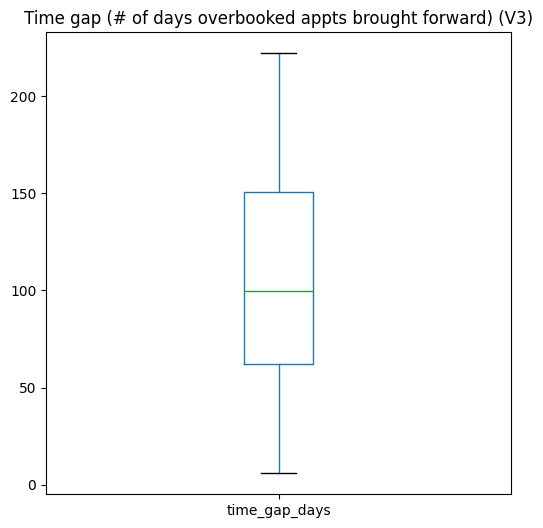

In [ ]:
# Calculate the average time gap
print("Avg. time gap (V3):", overbooked_df_v3["time_gap_days"].mean())
print("Median time gap (V3):", overbooked_df_v3["time_gap_days"].median())


# Plot boxplot
overbooked_df_v3.boxplot(column="time_gap_days", figsize=(6, 6), grid=False)
plt.title("Time gap (# of days overbooked appts brought forward) (V3)")
plt.show()